Nama : M. Rachman

Batch : RMT 26

Objective : memprediksi performance index menggunakan model linear regression

In [1]:
pip install opendatasets

In [2]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mohammadrachman
Your Kaggle Key: ··········


100%|██████████| 48.5k/48.5k [00:00<00:00, 17.8MB/s]

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/student-performance-multiple-linear-regression/Student_Performance.csv')

In [5]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


# handling missing values

In [36]:
import numpy as np

In [40]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [106]:
# cek row missing values seandainya ada missing values di Performance Index
data_null=df[df['Performance Index'].isnull()]
data_null

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index


# cek data dulicated

In [100]:
df.duplicated().sum()

127

In [102]:
df.drop_duplicates(inplace=True)

# cek cardinality

In [104]:
for i in df.columns :
  print(df[i].nunique())
  print(i)
  print('-'*10)

9
Hours Studied
----------
60
Previous Scores
----------
2
Extracurricular Activities
----------
6
Sleep Hours
----------
10
Sample Question Papers Practiced
----------
91
Performance Index
----------


# EDA

In [52]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


[Text(0, 0, '6.56968'), Text(0, 0, '6.4907')]

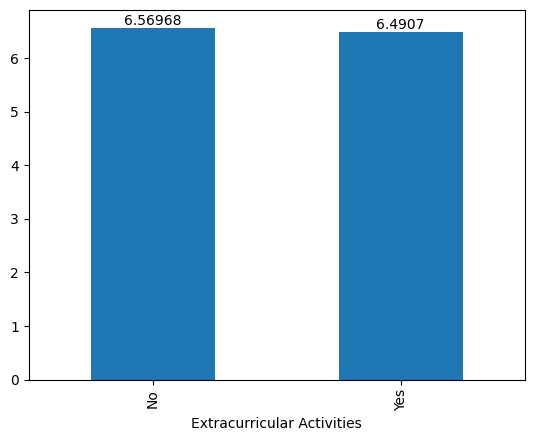

In [56]:
ax = df.groupby('Extracurricular Activities').mean()['Sleep Hours'].plot(kind='bar')
ax.bar_label(ax.containers[0])

Insight

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

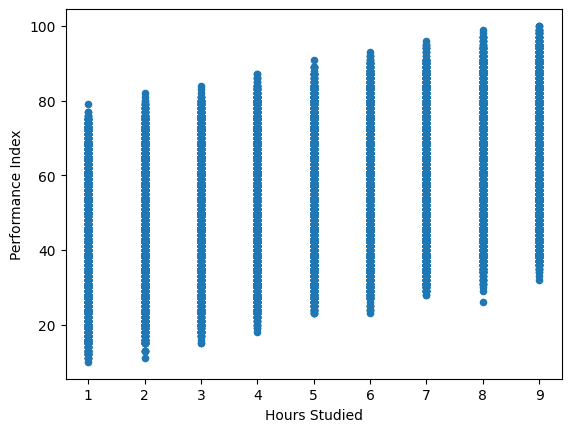

In [57]:
df.plot(x='Hours Studied',y='Performance Index',kind='scatter')

insight

The basic assumptions for the linear regression model are the following:

1) linear relationship

2) Little or no multicollinearity

3) multi-variate normality

4) Little or no autocorrelation among residues

5) Homoscedasticity of the errors. error should be random to all your predicted values

source : https://towardsdatascience.com/linear-regression-and-its-assumptions-ef6e8db4904d

## Feature Selection

In [6]:
import seaborn as sns

<Axes: >

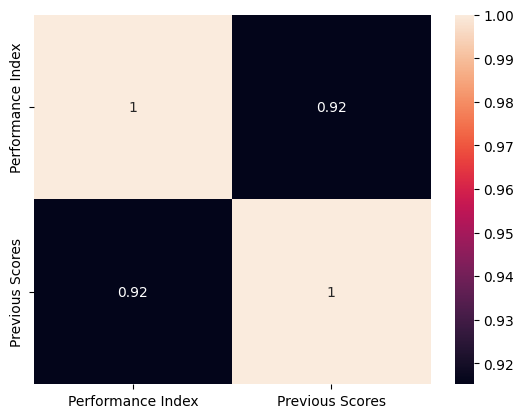

In [12]:
# korelasi heatmap untuk menenentukan data train
sns.heatmap(df[['Performance Index','Previous Scores']].corr(method='pearson'),annot=True)

insight

In [13]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

<Axes: >

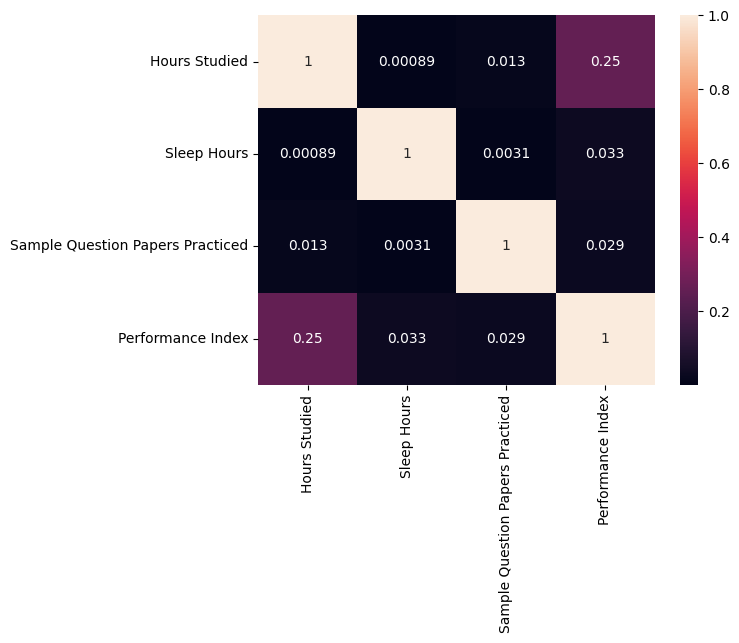

In [16]:
sns.heatmap(df[['Hours Studied','Sleep Hours', 'Sample Question Papers Practiced','Performance Index']].corr(method='kendall'),annot=True)

Insight

In [26]:
dat1 = pd.DataFrame()

replace strings

In [27]:
dat1['Extracurricular Activities'] = df['Extracurricular Activities'].replace(['Yes','No'],[0,1])

In [28]:
dat1['Performance Index'] = df['Performance Index'].copy()

<Axes: >

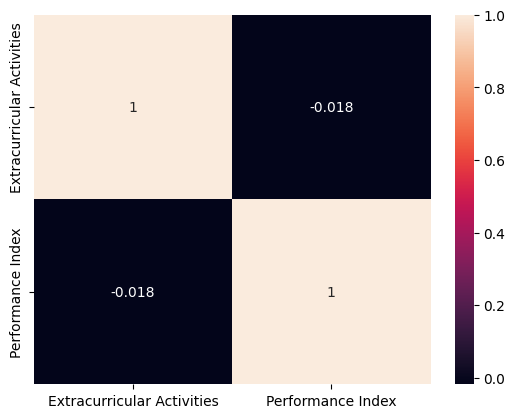

In [29]:
sns.heatmap(dat1.corr(method='kendall'),annot=True)

In [31]:
from scipy.stats import kendalltau

In [32]:
kendalltau(df['Extracurricular Activities'],df['Performance Index'])

SignificanceResult(statistic=0.01801886972139276, pvalue=0.028424732869425078)

In [59]:
X = df[['Previous Scores','Hours Studied']]
y = df['Performance Index']

# Cek Multicolinearity

## cek VIF

In [60]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [61]:
calc_vif(X)

,variables,VIF
0,Previous Scores,3.837797
1,Hours Studied,3.837797


Insight

# cek autocorrealtion

tidak ada autocorrealtion di data non time series

<Figure size 2000x1000 with 0 Axes>

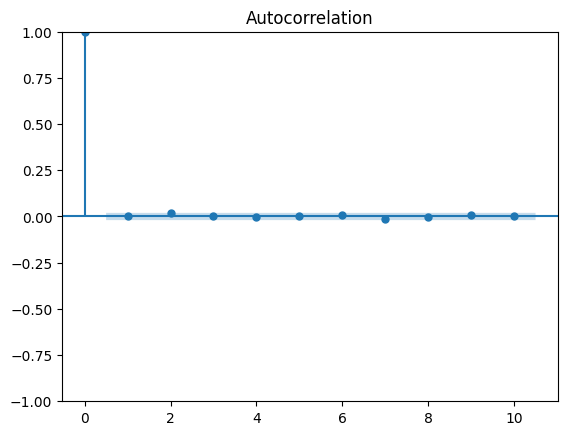

In [65]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

#plt.rc("figure", figsize=(20,10))
plt.figure(figsize=(20,10))
plot_acf(df['Previous Scores'], lags=10)
plt.show()

<Figure size 2000x1000 with 0 Axes>

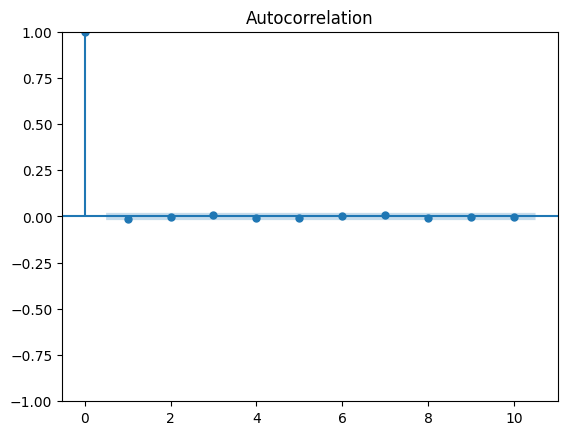

In [66]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

#plt.rc("figure", figsize=(20,10))
plt.figure(figsize=(20,10))
plot_acf(df['Hours Studied'], lags=10)
plt.show()

# Train Test Split

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [70]:
X_train.head()

,Previous Scores,Hours Studied
7496,58,3
7694,82,4
9248,96,4
2470,57,3
4392,44,2


In [87]:
len(df['Hours Studied'].value_counts())

9

cek distribusi sebelum handling outliers

In [73]:
X_train['Previous Scores'].skew()

-0.014367530496330074

<Axes: >

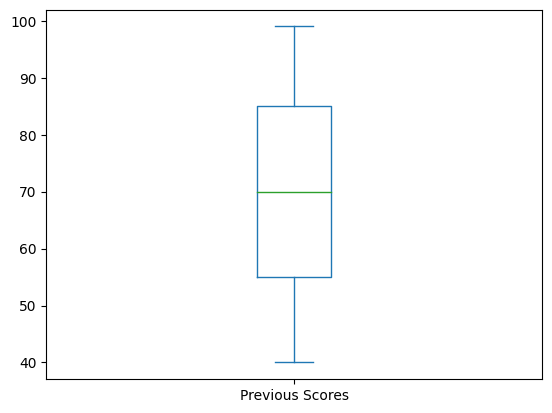

In [75]:
X_train['Previous Scores'].plot(kind='box')

# Handling outliers

In [76]:
pip install feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 5.0 MB/s eta 0:00:00


In [77]:
from feature_engine.outliers import Winsorizer

# handling outliers dengan cara censored skew moderate skew score 0.5 s/d 1 atau -0.5 s/d -1
# wz = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['Previous Scores'])

# handling outliers dengan cara censored skew extreme skew score 1 keatas atau dibawah -1
# wz = Winsorizer(capping_method='iqr', tail='both', fold=3, variables=['Previous Scores'])

# handling outliers distribusi normal
wz = Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=['Previous Scores'])

In [78]:
X_train_new= wz.fit_transform(X_train)

pastikan index sama antara X_train dan Y_train apabila menggunakan tehnik trimming untuk handling outliers

In [79]:
X_train.index

Int64Index([7496, 7694, 9248, 2470, 4392, 8768, 7493,   99, 8231, 6298,
            ...
            6400, 9289, 9224, 1520, 4829, 9372, 7291, 1344, 7293, 1289],
           dtype='int64', length=8000)

In [80]:
y_train.index

Int64Index([7496, 7694, 9248, 2470, 4392, 8768, 7493,   99, 8231, 6298,
            ...
            6400, 9289, 9224, 1520, 4829, 9372, 7291, 1344, 7293, 1289],
           dtype='int64', length=8000)

In [82]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler

Standard Scaler ketika rata2 distrbusi data train distribusinya normal

MinMax dan Robust digunakan ketika rata2 data train distribusinya skew

In [83]:
scaler = StandardScaler()

In [89]:
X_train_scale = scaler.fit_transform(X_train_new[['Previous Scores']])
X_test_scale = scaler.transform(X_test[['Previous Scores']])

In [90]:
X_train_scale

array([[-0.66910149],
       [ 0.71742782],
       [ 1.52623658],
       ...,
       [ 0.77519987],
       [ 1.29514836],
       [-1.70899848]])

concate data train

In [91]:
X_train_final = np.concatenate([X_train_new[['Hours Studied']],X_train_scale],axis=1)

dataframe train

In [92]:
X_train_final = pd.DataFrame(X_train_final,columns=X_train.columns)

concat data test

In [93]:
X_test_final = np.concatenate([X_test[['Hours Studied']],X_test_scale],axis=1)

dataframe test

In [94]:
X_test_final = pd.DataFrame(X_test_final,columns=X_train.columns)

In [95]:
X_test_final.head()

,Previous Scores,Hours Studied
0,1.0,-0.149153
1,5.0,-1.651226
2,2.0,-0.611329
3,7.0,-0.669101
4,3.0,-0.669101


# Define Model

In [96]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [97]:
model.fit(X_train_final,y_train)

LinearRegression()

In [98]:
y_pred_train = model.predict(X_train_final)

y_pred_test = model.predict(X_test_final)

# Evaluasi Model

best fit / good fit = train score dan test score sama-sama baik

under fit = train score jelek dan test score jelek

over fit = train score baik dan test score jelek ataupun sebaliknya

In [107]:
from sklearn.metrics import r2_score

train_score = r2_score(y_train,y_pred_train)
print(f'hasil train score : {train_score}')

hasil train score : 0.9858858225512406


In [120]:
test_score = r2_score(y_test,y_pred_test)
print(f'hasil test score : {test_score}')

hasil test score : 0.9857929448973036


In [112]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

print(f'MAE Train : {mean_absolute_error(y_train,y_pred_train)}')

print(f'MAE Test : {mean_absolute_error(y_test,y_pred_test)}')

print(f'MSE Train : {mean_squared_error(y_train,y_pred_train)}')

print(f'MSE Test : {mean_squared_error(y_test,y_pred_test)}')

print(f'RMSE Train : {np.sqrt(mean_squared_error(y_train,y_pred_train))}')

print(f'RMSE Test : {np.sqrt(mean_squared_error(y_test,y_pred_test))}')

print(f'MAPE Train : {mean_absolute_percentage_error(y_train,y_pred_train)}')

print(f'MAPE Test : {mean_absolute_percentage_error(y_test,y_pred_test)}')

MAE Train : 1.8151972848274414
MAE Test : 1.8290464120653491
MSE Train : 5.191914727786841
MSE Test : 5.3043744184588295
RMSE Train : 2.278577347334701
RMSE Test : 2.3031227536670356
MAPE Train : 0.03850446800615858
MAPE Test : 0.04013400552251458


MAE dan RMSE bisa dilihat apakah selsisihnya besar atau tidak, apabila besar maka data yang di train banyak mengandung outliers

MAE dan RMSE harus dibandingkan dengan rata-rata masing-masing data

MAE dan RMSE dikatakan buruk ketika score mendekati rata-rata target

# Regularisasi

cara menghandling apabila overfit

In [134]:
from sklearn.linear_model import Ridge

In [135]:
ridge = Ridge(alpha=15)

In [136]:
ridge.fit(X_train_final,y_train)

Ridge(alpha=15)

In [137]:
ridge.predict(X_train_final)

array([37.89037715, 65.16239078, 79.40275457, ..., 66.17955962,
       89.63388626, 16.72137657])

In [119]:
y_train.mean()

55.406625

# Kesimpulan

Contoh kriteria analisa yang baik diantaranya adalah:

1. Terdapat penjelasan macam-macam hasil metric evaluasi dan interpretasinya terhadap kasus yang diselesaikan.
2. Dapat menjelaskan KELEBIHAN dan KELEMAHAN dari model yang dibuat DENGAN KAITANNYA DENGAN DOMAIN BUSINESS YANG DIHADAPI yang dibuktikan dengan eksplorasi sederhana (grafik, plot, teori, dll).
3. Dapat memberikan statement untuk improvement selanjutnya dari model yang dibuat.
4. Dapat menyebutkan insight yang dapat diambil setelah proses EDA, dll.

In [125]:
X_train.head()

,Previous Scores,Hours Studied
7496,58,3
7694,82,4
9248,96,4
2470,57,3
4392,44,2


In [123]:
print(f'slope dari model adalah : {model.coef_}')

slope dari model adalah : [ 2.86091808 17.63963133]


* notes : apabila teman-teman mengguakan onehot encoding, pasti hasil interceptnya tidak masuk akal yaa..

In [127]:
print(f'Intercept dari model adalah : {model.intercept_}')

Intercept dari model adalah : 41.08629953558605


# Save Model

In [128]:
import pickle

In [129]:

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)


with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [130]:
X_train.describe()

,Previous Scores,Hours Studied
count,8000.000000,8000.000000
mean,69.581750,5.005500
std,17.310489,2.583564
min,40.000000,1.000000
25%,55.000000,3.000000
50%,70.000000,5.000000
75%,85.000000,7.000000
max,99.000000,9.000000


In [131]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 7496 to 1289
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Previous Scores  8000 non-null   int64
 1   Hours Studied    8000 non-null   int64
dtypes: int64(2)
memory usage: 187.5 KB


In [132]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,6.531652,4.583004,55.216651
std,2.589081,17.325601,1.697683,2.867202,19.208570
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


# membuat fungsi logistic regression

In [141]:
def log_reg (X):
  coef= 1.5
  intercept = -5
  z = coef * X + intercept
  y_pred = 1/ (1+np.exp(1)**(-z))

  if y_pred > 0.5:
    return print(f'probability {y_pred} prediksinya adalah LULUS')
  else:
    return print(f'probability {y_pred} prediksinya adalah Tidak LULUS')

In [147]:
log_reg(1)

probability 0.029312230751356326 prediksinya adalah Tidak LULUS


In [145]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [148]:
df = pd.read_csv('/content/drive/MyDrive/hacktiv8/bahan/linreg & logreg/hearing_test.csv')

In [149]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [150]:
df.test_result.value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

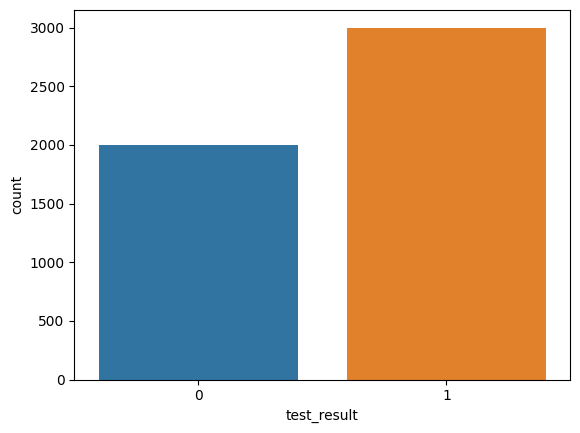

In [151]:
sns.countplot(data=df,x='test_result')

<Axes: xlabel='test_result', ylabel='age'>

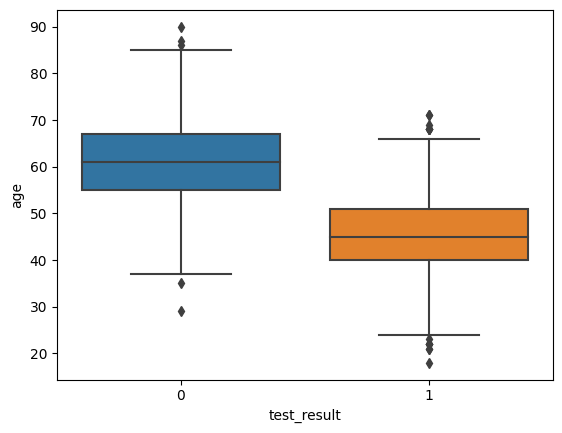

In [152]:
sns.boxplot(x='test_result',y='age',data=df)

<Axes: >

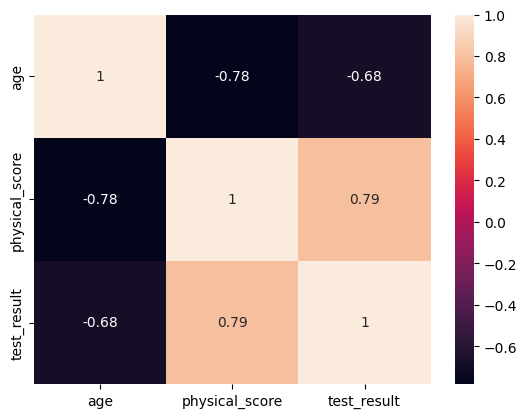

In [153]:
sns.heatmap(df.corr(),annot=True)

In [154]:
X = df.drop('test_result',axis=1)
y = df['test_result']

In [169]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [170]:
calc_vif(X)

,variables,VIF
0,age,5.66531
1,physical_score,5.66531


In [155]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101,stratify=y)

In [157]:
scaler = MinMaxScaler()

In [158]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [159]:
from sklearn.linear_model import LogisticRegression

In [160]:
log_model = LogisticRegression()

In [161]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [162]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix,precision_score,recall_score

In [163]:
y_pred_train = log_model.predict(scaled_X_train)
y_pred_test = log_model.predict(scaled_X_test)

In [164]:
y_pred_train

array([0, 0, 0, ..., 0, 0, 1])

In [165]:
print('accuracy score train : ',accuracy_score(y_train,y_pred_train))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test))

accuracy score train :  0.91575
accuracy score test :  0.911


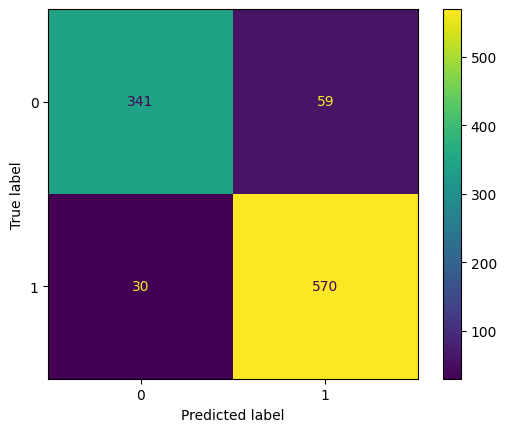

In [166]:
cm = confusion_matrix(y_test, y_pred_test, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)

disp.plot()
plt.show()

In [167]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       400
           1       0.91      0.95      0.93       600

    accuracy                           0.91      1000
   macro avg       0.91      0.90      0.91      1000
weighted avg       0.91      0.91      0.91      1000



In [168]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1600
           1       0.91      0.95      0.93      2400

    accuracy                           0.92      4000
   macro avg       0.92      0.91      0.91      4000
weighted avg       0.92      0.92      0.92      4000



In [171]:
log_model.coef_

array([[-6.11657243, 13.93735918]])

In [172]:
log_model.intercept_

array([-5.476661])

In [173]:
y_pred_new_proba = log_model.predict_proba(scaled_X_test)
y_pred_new_proba

array([[0.18160693, 0.81839307],
       [0.18435813, 0.81564187],
       [0.45838598, 0.54161402],
       ...,
       [0.09727677, 0.90272323],
       [0.41528617, 0.58471383],
       [0.00889235, 0.99110765]])

In [175]:
X_test.iloc[0]

age               50.0
physical_score    35.5
Name: 3129, dtype: float64

In [176]:
y_pred_new_proba[0]

array([0.18160693, 0.81839307])

In [177]:
y_pred_test[0]

1